In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# import data

maxlon = 171
minlon = 140

Tok1 = pd.read_csv(r'../data/Tokyo1_chl.csv', sep = ',')
Tok1['density'] = sw.rho(Tok1['S'].values,Tok1['T'].values,0)
Tok1 = Tok1[(Tok1['Lon']>minlon) & (Tok1['Lon']<maxlon)].dropna().reset_index(drop = True)

Tok3 = pd.read_csv(r'../data/Tokyo3_chl.csv', sep = ',')
Tok3['density'] = sw.rho(Tok3['S'].values,Tok3['T'].values,0)
Tok3 = Tok3[(Tok3['Lon']>minlon) & (Tok3['Lon']<maxlon)].dropna().reset_index(drop = True)

Tian = pd.read_csv(r'../data/Tian_chl.csv', sep = ',')
Tian['density'] = sw.rho(Tian['S'].values,Tian['T'].values,0)
Tian = Tian[(Tian['Lon']>minlon) & (Tian['Lon']<maxlon)].dropna().reset_index(drop = True)

print Tian.columns

Index([u'Unnamed: 0', u'Timestamp', u'Lat', u'Lon', u'S', u'T', u'Fluo',
       u'TrueO2Ar', u'O2Arsat', u'O2Arbiosat', u'MLD (WOA13)', u'Wkn',
       u'Air-sea flux', u'density', u'dx', u'x', u'chl'],
      dtype='object')


In [5]:
Tok3.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1161.0,940.000000,335.296138,360.000000,650.000000,940.000000,1230.000000,1520.000000
Timestamp,1161.0,734770.632260,0.956059,734769.024000,734769.790600,734770.603100,734771.521900,734772.288500
Lat,1161.0,37.996230,2.965540,32.834904,35.372141,38.018414,40.842401,42.687328
Lon,1161.0,154.788490,8.997260,140.009225,146.903682,154.273796,162.922192,170.984125
S,1161.0,33.865280,1.142158,32.547920,33.528018,33.812658,34.294426,68.599003
T,1161.0,23.538593,3.229907,18.009381,20.174905,24.352101,26.887698,32.159178
Fluo,1161.0,0.355901,0.449286,-0.009224,0.083009,0.162602,0.478715,2.202320
TrueO2Ar,1161.0,20.630022,0.198981,20.141703,20.477503,20.605170,20.772786,21.139420
O2Arsat,1161.0,20.359037,0.007963,20.310496,20.351250,20.356684,20.366822,20.374364
O2Arbiosat,1161.0,1.330775,0.949323,-1.036814,0.608659,1.214538,2.001025,3.819723


(array([  0.,   1.,   1.,   4.,   2.,   5.,   7.,  11.,  18.,  26.,  21.,
         41.,  44.,  37.,  52.,  60.,  55.,  58.,  81.,  61.,  66.,  55.,
         53.,  61.,  42.,  44.,  52.,  41.,  40.,  37.,  31.,  14.,  13.,
          7.,   3.,   2.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   2.,
          3.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]),
 array([-20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,
          6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,
         32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,
         58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,
         84,  86,  88,  90,  92,  94,  96,  98]),
 <a list of 59 Patch objects>)

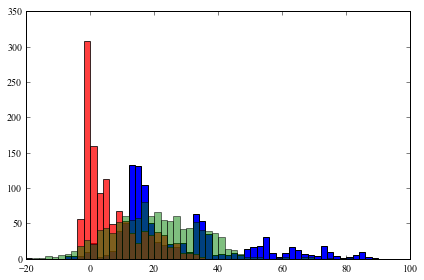

In [22]:
plt.hist(Tok1['Air-sea flux'].values,color='b', bins = np.arange(-20, 100, 2), zorder = 0)
plt.hist(Tian['Air-sea flux'].values,color='r', bins = np.arange(-20, 100, 2), alpha = 0.75, zorder = 1)
plt.hist(Tok3['Air-sea flux'].values,color='g', bins = np.arange(-20, 100, 2), alpha = 0.5, zorder = 2)
